In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# Description:
#   Exercise9 notebook.
#
# Copyright (C) 2018 Tapio Honka, Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

from utils import vgg_KR_from_P

# CS-E4850 Computer Vision Exercise Round 9

For these exercises you will need a python environment with necessary packages installed. For installation, see the README in the main page of this assignments repository.

The problems should be solved before the exercise session and solutions returned via the MyCourses page. Upload only ONE file for the programming tasks, i.e. this notebook filled with your implementations and anything else that is asked or needed.
Note that (1) you are not supposed to change anything in the utils.py and (2) you should be sure that everything that that you need to implement should work with the pictures specified by the assignments of this exercise round.

## Exercise 1 - Camera calibration

In this exercise you will need to implement the direct linear transform (DLT) method for camera calibration. The algorithm is described on slide 22 of Lecture 8. It is also presented in the book by Hartley \& Zisserman (Section 7.1 in the second edition). 

The calibration object is a bookshelf whose dimensions are known. That is, width of a shelf is 758 mm, depth is 295 mm, and height between shelves is 360 mm.

Proceed as follows:

a) Check the cells below and try to run them.<br>
b) The corners of the bookshelf are already manually localized from the given two images and visualized by the script. See the comments in the source code.<br>
c) Implement the missing function <b>camcalibDLT</b>.<br>
d) Calibrate both cameras and check the results visually by uncommenting the relevant lines from the example code.<br>
e) Report the estimated intrinsic camera calibration matrices for both cameras (i.e.variables $K_{1}, K_{2}$). 


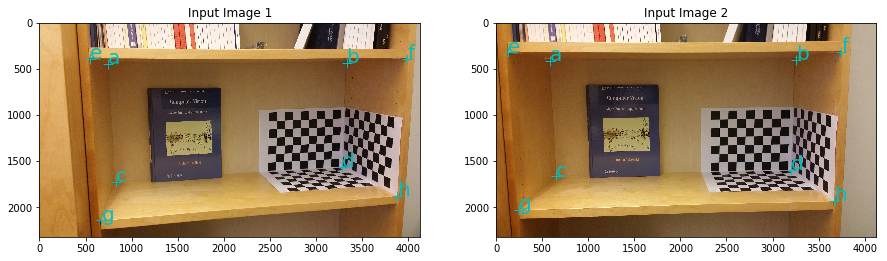

In [2]:
im1 = imread('im1.jpg')
im2 = imread('im2.jpg')

# The given image coordinates were originally localized manually 
# using Matlab's ginput
# x1,y1 = ginput(8)

# Im1 annotations
x1 = 1.0e+03 * np.array([0.7435, 3.3315, 0.8275, 3.2835, 
                      0.5475, 3.9875, 0.6715, 3.8835])
    
y1 = 1.0e+03 * np.array([0.4455, 0.4335, 1.7215, 1.5615, 
                      0.3895, 0.3895, 2.1415, 1.8735])

# Im2 annotations
x2 = 1.0e+03 * np.array([0.5835, 3.2515, 0.6515, 3.1995, 
                    0.1275, 3.7475, 0.2475, 3.6635])
    
y2 = 1.0e+03 * np.array([0.4135, 0.4015, 1.6655, 1.5975, 
                     0.3215, 0.3135, 2.0295, 1.9335])
                      
# Image coordinates of points as rows of matrix 'abcdefgh'
abcdefgh = np.vstack((x1, y1)).T

# World coordinates of the points
ABCDEFGH_w = np.array([[758, 0, -295], [0, 0, -295], [758, 360, -295],
                    [0, 360, -295], [758, 0, 0], [0, 0, 0], [758, 360, 0],
                    [0, 360, 0]])

labels = ['a','b','c','d','e','f','g','h']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax = axes.ravel()
ax[0].imshow(im1)
ax[0].plot(x1, y1, 'c+', markersize=10)
for i in range(len(x1)):    
    ax[0].annotate(labels[i], (x1[i], y1[i]), color='c', fontsize=20)
ax[0].set_title("Input Image 1")

ax[1].imshow(im2)
ax[1].plot(x2, y2, 'c+', markersize=10)
for i in range(len(x2)):    
    ax[1].annotate(labels[i], (x2[i], y2[i]), color='c', fontsize=20)
ax[1].set_title("Input Image 2")
plt.show()

In [4]:
def camcalibDLT(Xworld, Xim):
    ##-your-code-starts-here-##

    
    
    ##-your-code-starts-here-##
    return P


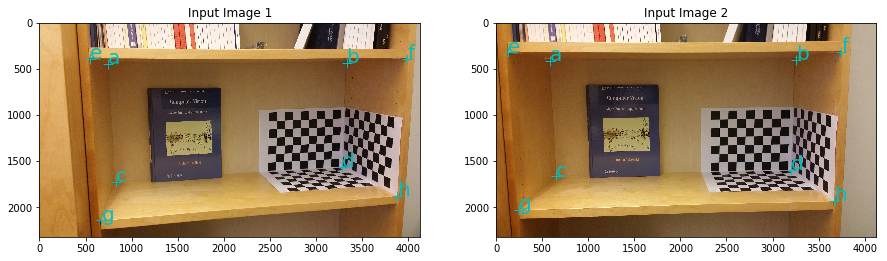

In [3]:
## the task is to implement the missing funcion camcalibDLT.
# The algorithm is summarised on slide 22 of Lecture 8.
# The function takes the homogeneous coordinates of the points as input.

## Calibration of camera 1

# Uncomment the code lines below once you have implemented the camcalibDLT function.
#P1 = camcalibDLT(np.hstack((ABCDEFGH_w, np.ones((8,1)))), 
#                 np.hstack((abcdefgh, np.ones((8,1)))))

# Check the results by projecting the world points with the estimated P.
# The projected points should overlap with manually localized points
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax = axes.ravel()
ax[0].imshow(im1)

# plot manually localized
ax[0].plot(x1, y1, 'c+', markersize=10)
for i in range(len(x1)):    
    ax[0].annotate(labels[i], (x1[i], y1[i]), color='c', fontsize=20)
ax[0].set_title("Input Image 1")

# plot projected
#pproj1 = np.dot(P1, np.hstack((ABCDEFGH_w, np.ones((8,1)))).T)
#for i in range(8):
#    ax[0].plot(pproj1[0,i] / pproj1[2,i], pproj1[1,i] / pproj1[2,i], 'rx', markersize=12)

    
## Calibration of camera 2    

# Uncomment the code lines below once you have implemented the camcalibDLT function.
#P2 = camcalibDLT(np.hstack((ABCDEFGH_w, np.ones((8,1)))), 
#                 np.vstack((x2,y2, np.ones(8))).T)

# Check the results by projecting the world points with the estimated P.
# The projected points should overlap with manually localized points
ax[1].imshow(im2)
ax[1].plot(x2, y2, 'c+', markersize=10)

# plot manually localized
for i in range(len(x2)):    
    ax[1].annotate(labels[i], (x2[i], y2[i]), color='c', fontsize=20)
ax[1].set_title("Input Image 2")

# plot projected
#pproj2 = np.dot(P2, np.hstack((ABCDEFGH_w, np.ones((8,1)))).T)
#for i in range(8):
#    ax[1].plot(pproj2[0,i] / pproj2[2,i], pproj2[1,i] / pproj2[2,i], 'rx', markersize=12)

plt.show()

In [7]:
## Intrinsic and extrinsic camera parameters K,R,t can be extracted from P
## the following functions are from http://www.robots.ox.ac.uk/~vgg/hzbook/code/

K1, R1, t1 = vgg_KR_from_P(P1)
K2, R2, t2 = vgg_KR_from_P(P2)

## Finally, save P1 and P2 for part 2 of this exercise
np.save('P1.npy', P1)
np.save('P2.npy', P2)

## Exercise 2 - Triangulation
In this exercise you will need to implement the linear triangulation method described on slides 31 and 32 of Lecture 8.  (The method is also presented in the book by Hartley \& Zisserman.) You must again find a least-squares solution to a system of linear equations. In a similar manner as in exercise problem 1, it can be computed by solving the eigenvectors and eigenvalues of a real symmetric matrix (see numpy's built-in function np.linalg.eig).

As illustrated by the example script, the points that will be triangulated are the corner points of the picture on the cover of the course book. As a result of the triangulation we will get the coordinates of these corner points in the world coordinate frame. By computing the distances between the points, we can measure the width and height of the picture in millimeters.

Proceed as follows:

a) Check the cells below and try to run them. <br>
b) The corners of the picture on the book cover are already manually localized from the given two images and visualized by the script. See the comments in the source code. <br>
c) Implement the missing function <b>trianlin</b>. <br>
d) Triangulate the three given point correspondences. Here you will need also the estimated camera projection matrices ($P_{1}, P_{2}$) from exercise problem 1. You can use the same projection matrices here because the two images are the same as in the calibration problem.<br>
e) Report the estimated width and height of the picture by computing the distances between triangulated points.


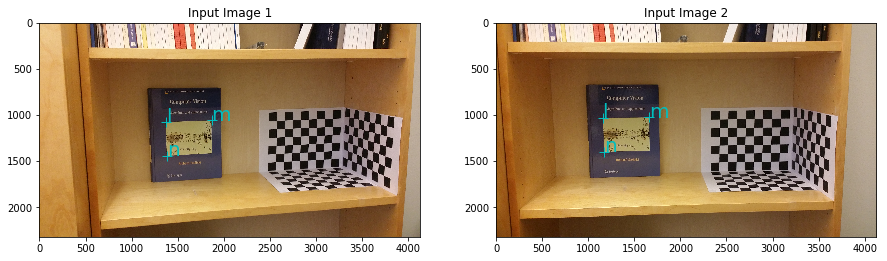

In [4]:
# Visualization of three point correspondences in both images
im1 = imread('im1.jpg')
im2 = imread('im2.jpg')

# Points L, M, N in image 1
lmn1 = 1.0e+03 * np.array([[1.3715, 1.0775], 
                        [1.8675, 1.0575], 
                        [1.3835, 1.4415]])

# Points L, M, N in image 2
lmn2 = 1.0e+03 * np.array([[1.1555, 1.0335],
                        [1.6595, 1.0255],
                        [1.1755, 1.3975]])
                   
pointlabels=['l','m','n']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax = axes.ravel()
ax[0].imshow(im1)
ax[0].plot(lmn1[:,0], lmn1[:,1], 'c+', markersize=10)
for i in range(len(lmn1)):    
    ax[0].annotate(pointlabels[i], (lmn1[i,0], lmn1[i,1]), color='c', fontsize=20)
ax[0].set_title("Input Image 1")

ax[1].imshow(im2)
ax[1].plot(lmn2[:,0], lmn2[:,1], 'c+', markersize=10)
for i in range(len(lmn2)):    
    ax[1].annotate(pointlabels[i], (lmn2[i,0], lmn2[i,1]), color='c', fontsize=20)
ax[1].set_title("Input Image 2")
plt.show()

In [10]:
def trianglin(P1, P2, x1, x2):
    ##-your-code-starts-here-##

    ##-your-code-ends-here-##
    return X

In [5]:
## the task is to implement the missing function trianglin.
# The algorithm is described on slides 31 and 32 of Lecture 8.
# Output should be the homogeneous coordinates of the triangulated point.

# Load the projection matrices from the first part
P1 = np.load('P1.npy', encoding='latin1')
P2 = np.load('P2.npy', encoding='latin1')

# Uncomment the lines below once you have implemented the trianglin function.
#L = trianglin(P1, P2, np.hstack((lmn1[0,:].T, [1])), 
#                      np.hstack((lmn2[0,:].T, [1])))
#M = trianglin(P1, P2, np.hstack((lmn1[1,:].T, [1])), 
#                      np.hstack((lmn2[1,:].T, [1])))
#N = trianglin(P1, P2, np.hstack((lmn1[2,:].T, [1])), 
#                      np.hstack((lmn2[2,:].T, [1])))
                      
# We can then compute the width and height of the picture on the book
#picture_w_mm = np.linalg.norm(L[0:3] / L[3] - M[0:3] / M[3])
#picture_h_mm = np.linalg.norm(L[0:3] / L[3] - N[0:3] / N[3])
#print("Picture width: %.2f mm" % picture_w_mm.item())
#print("Picture height: %.2f mm" % picture_h_mm.item())